## Group Project

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_excel('./Data/satisfaction.xlsx')
df = pd.read_csv('./Data/satisfaction.csv')
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print(df.head())

Shape of dataset: (129880, 24)

Data Types:
 id                                     int64
satisfaction_v2                       object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boa

In [3]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             39

In [4]:
print("\nSummary Statistics:\n", df.describe(include='all'))



Summary Statistics:
                    id satisfaction_v2  Gender   Customer Type            Age  \
count   129880.000000          129880  129880          129880  129880.000000   
unique            NaN               2       2               2            NaN   
top               NaN       satisfied  Female  Loyal Customer            NaN   
freq              NaN           71087   65899          106100            NaN   
mean     64940.500000             NaN     NaN             NaN      39.427957   
std      37493.270818             NaN     NaN             NaN      15.119360   
min          1.000000             NaN     NaN             NaN       7.000000   
25%      32470.750000             NaN     NaN             NaN      27.000000   
50%      64940.500000             NaN     NaN             NaN      40.000000   
75%      97410.250000             NaN     NaN             NaN      51.000000   
max     129880.000000             NaN     NaN             NaN      85.000000   

         Type of 


Satisfaction Value Counts:
 satisfaction_v2
satisfied                  71087
neutral or dissatisfied    58793
Name: count, dtype: int64


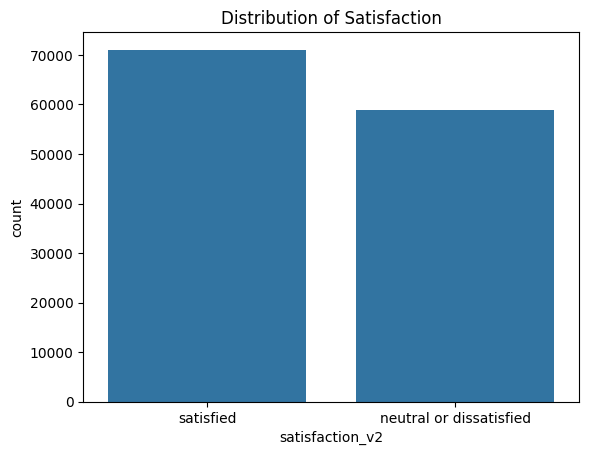

In [5]:
# Check class balance (if satisfaction is the target column)
if 'satisfaction_v2' in df.columns:
    print("\nSatisfaction Value Counts:\n", df['satisfaction_v2'].value_counts())
    sns.countplot(data=df, x='satisfaction_v2')
    plt.title('Distribution of Satisfaction')
    plt.show()

some slight imbalance between the classes which is likely being reduced by the combining of classes 

reporting bias considerations: the neutral and dissatisfied values have been grouped together which could affect the performance of a model as it masks class imbalance and can minimise the predictive power of a model as the nuanced patterns get lost in the data.

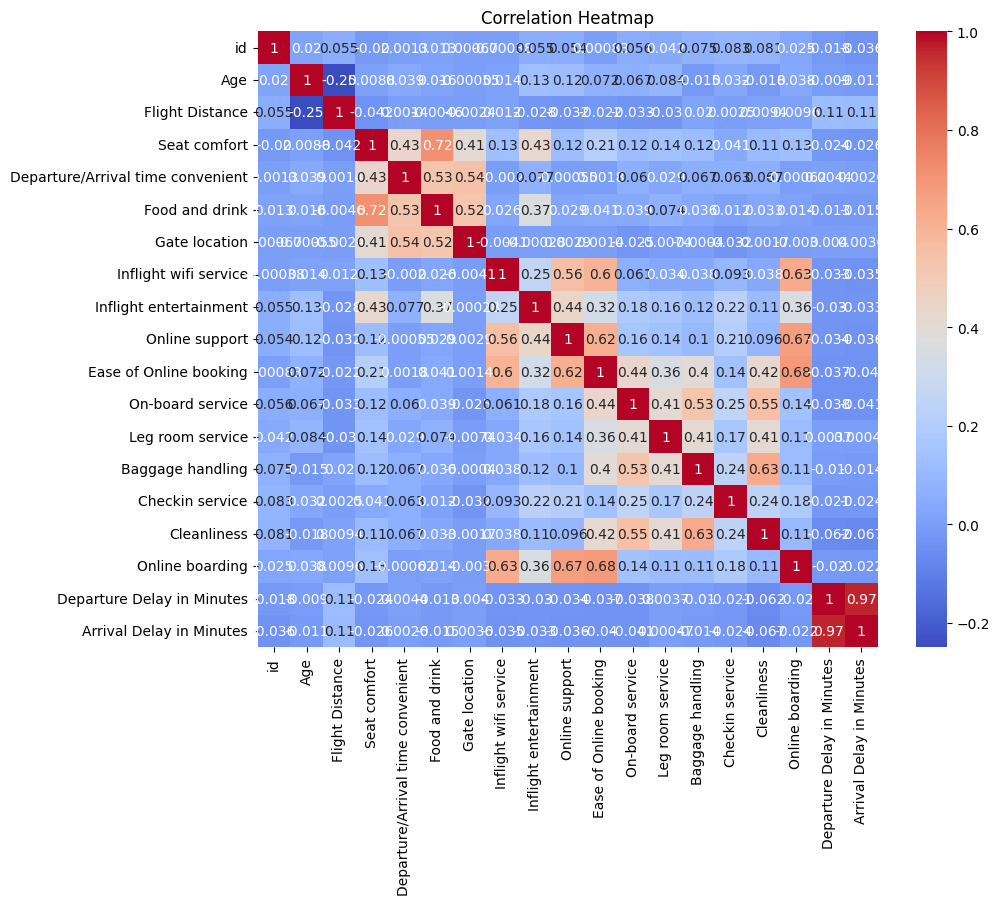

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

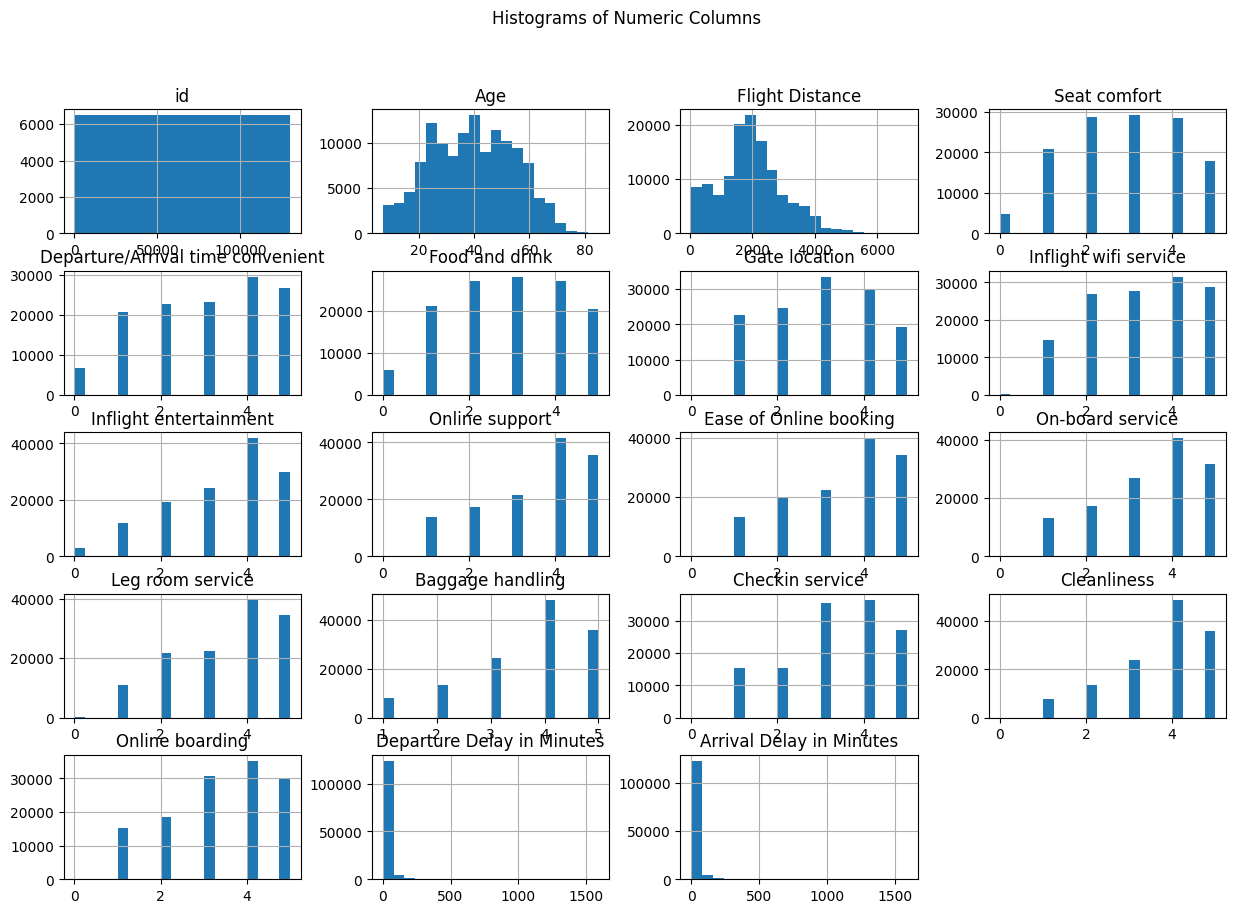

In [7]:
df.select_dtypes(include='number').hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

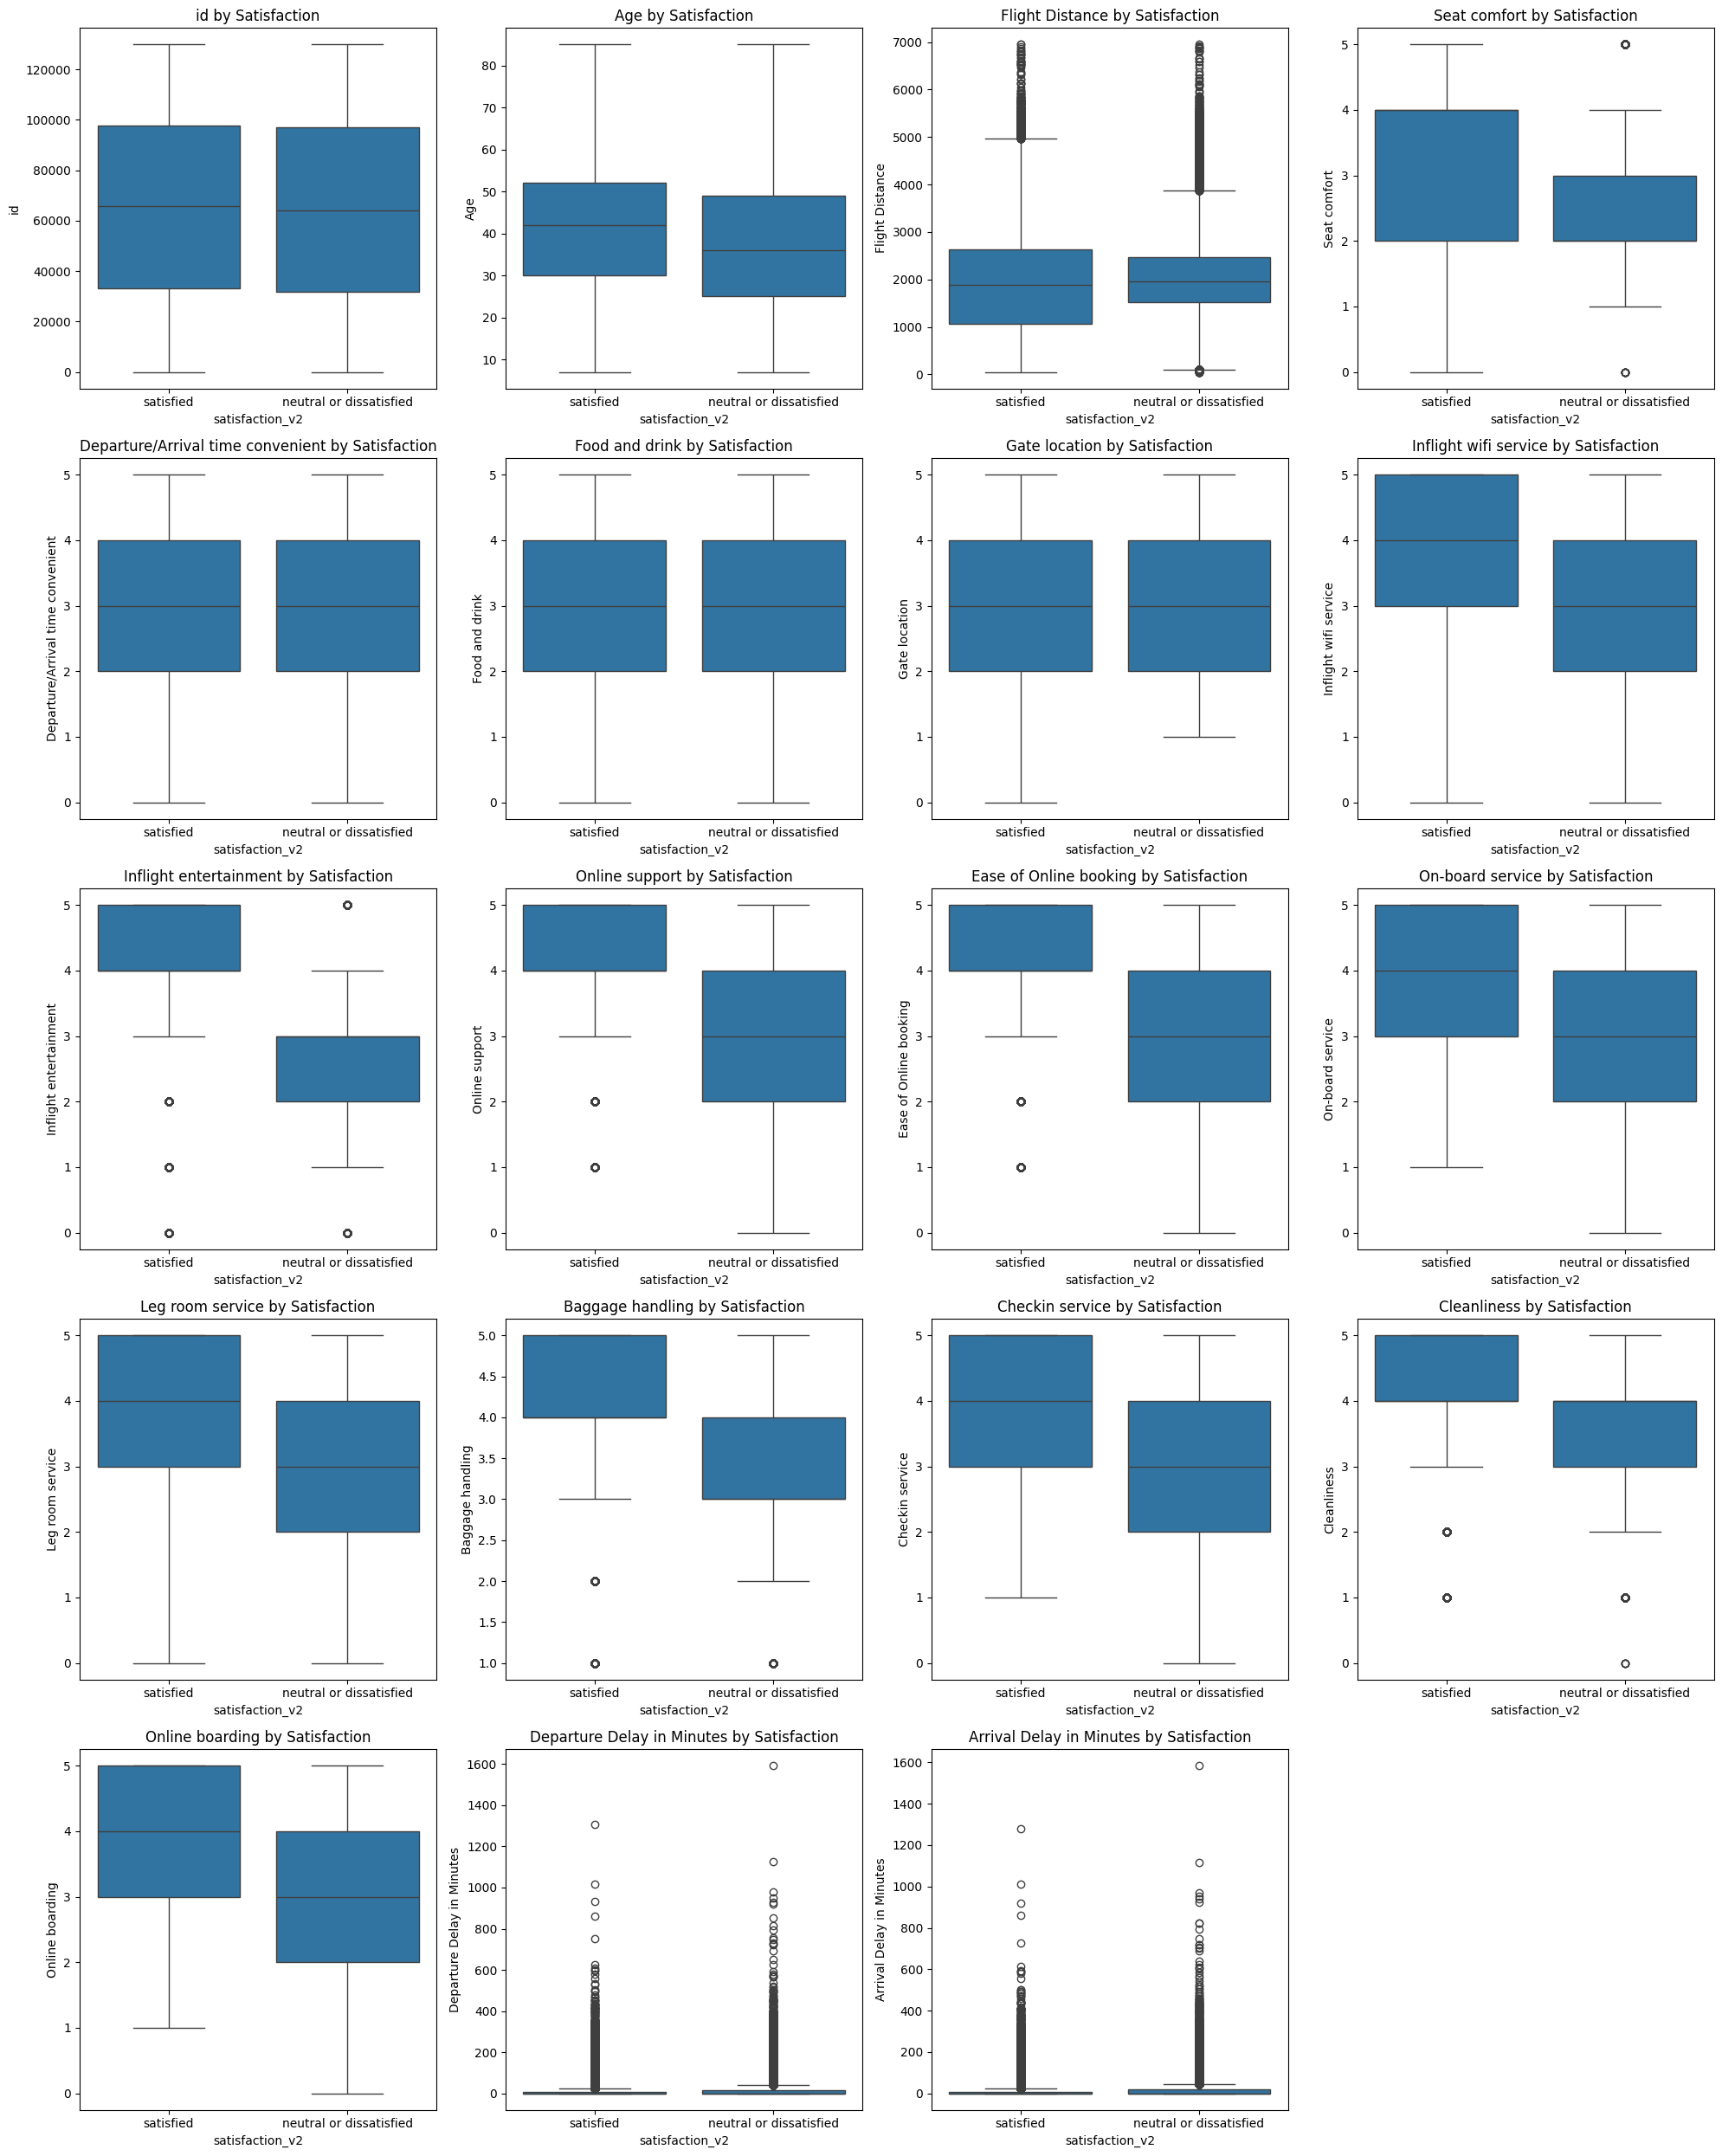

In [8]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 4
n_rows = -(-len(numeric_cols) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Flatten in case of multiple rows

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x='satisfaction_v2', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Satisfaction')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

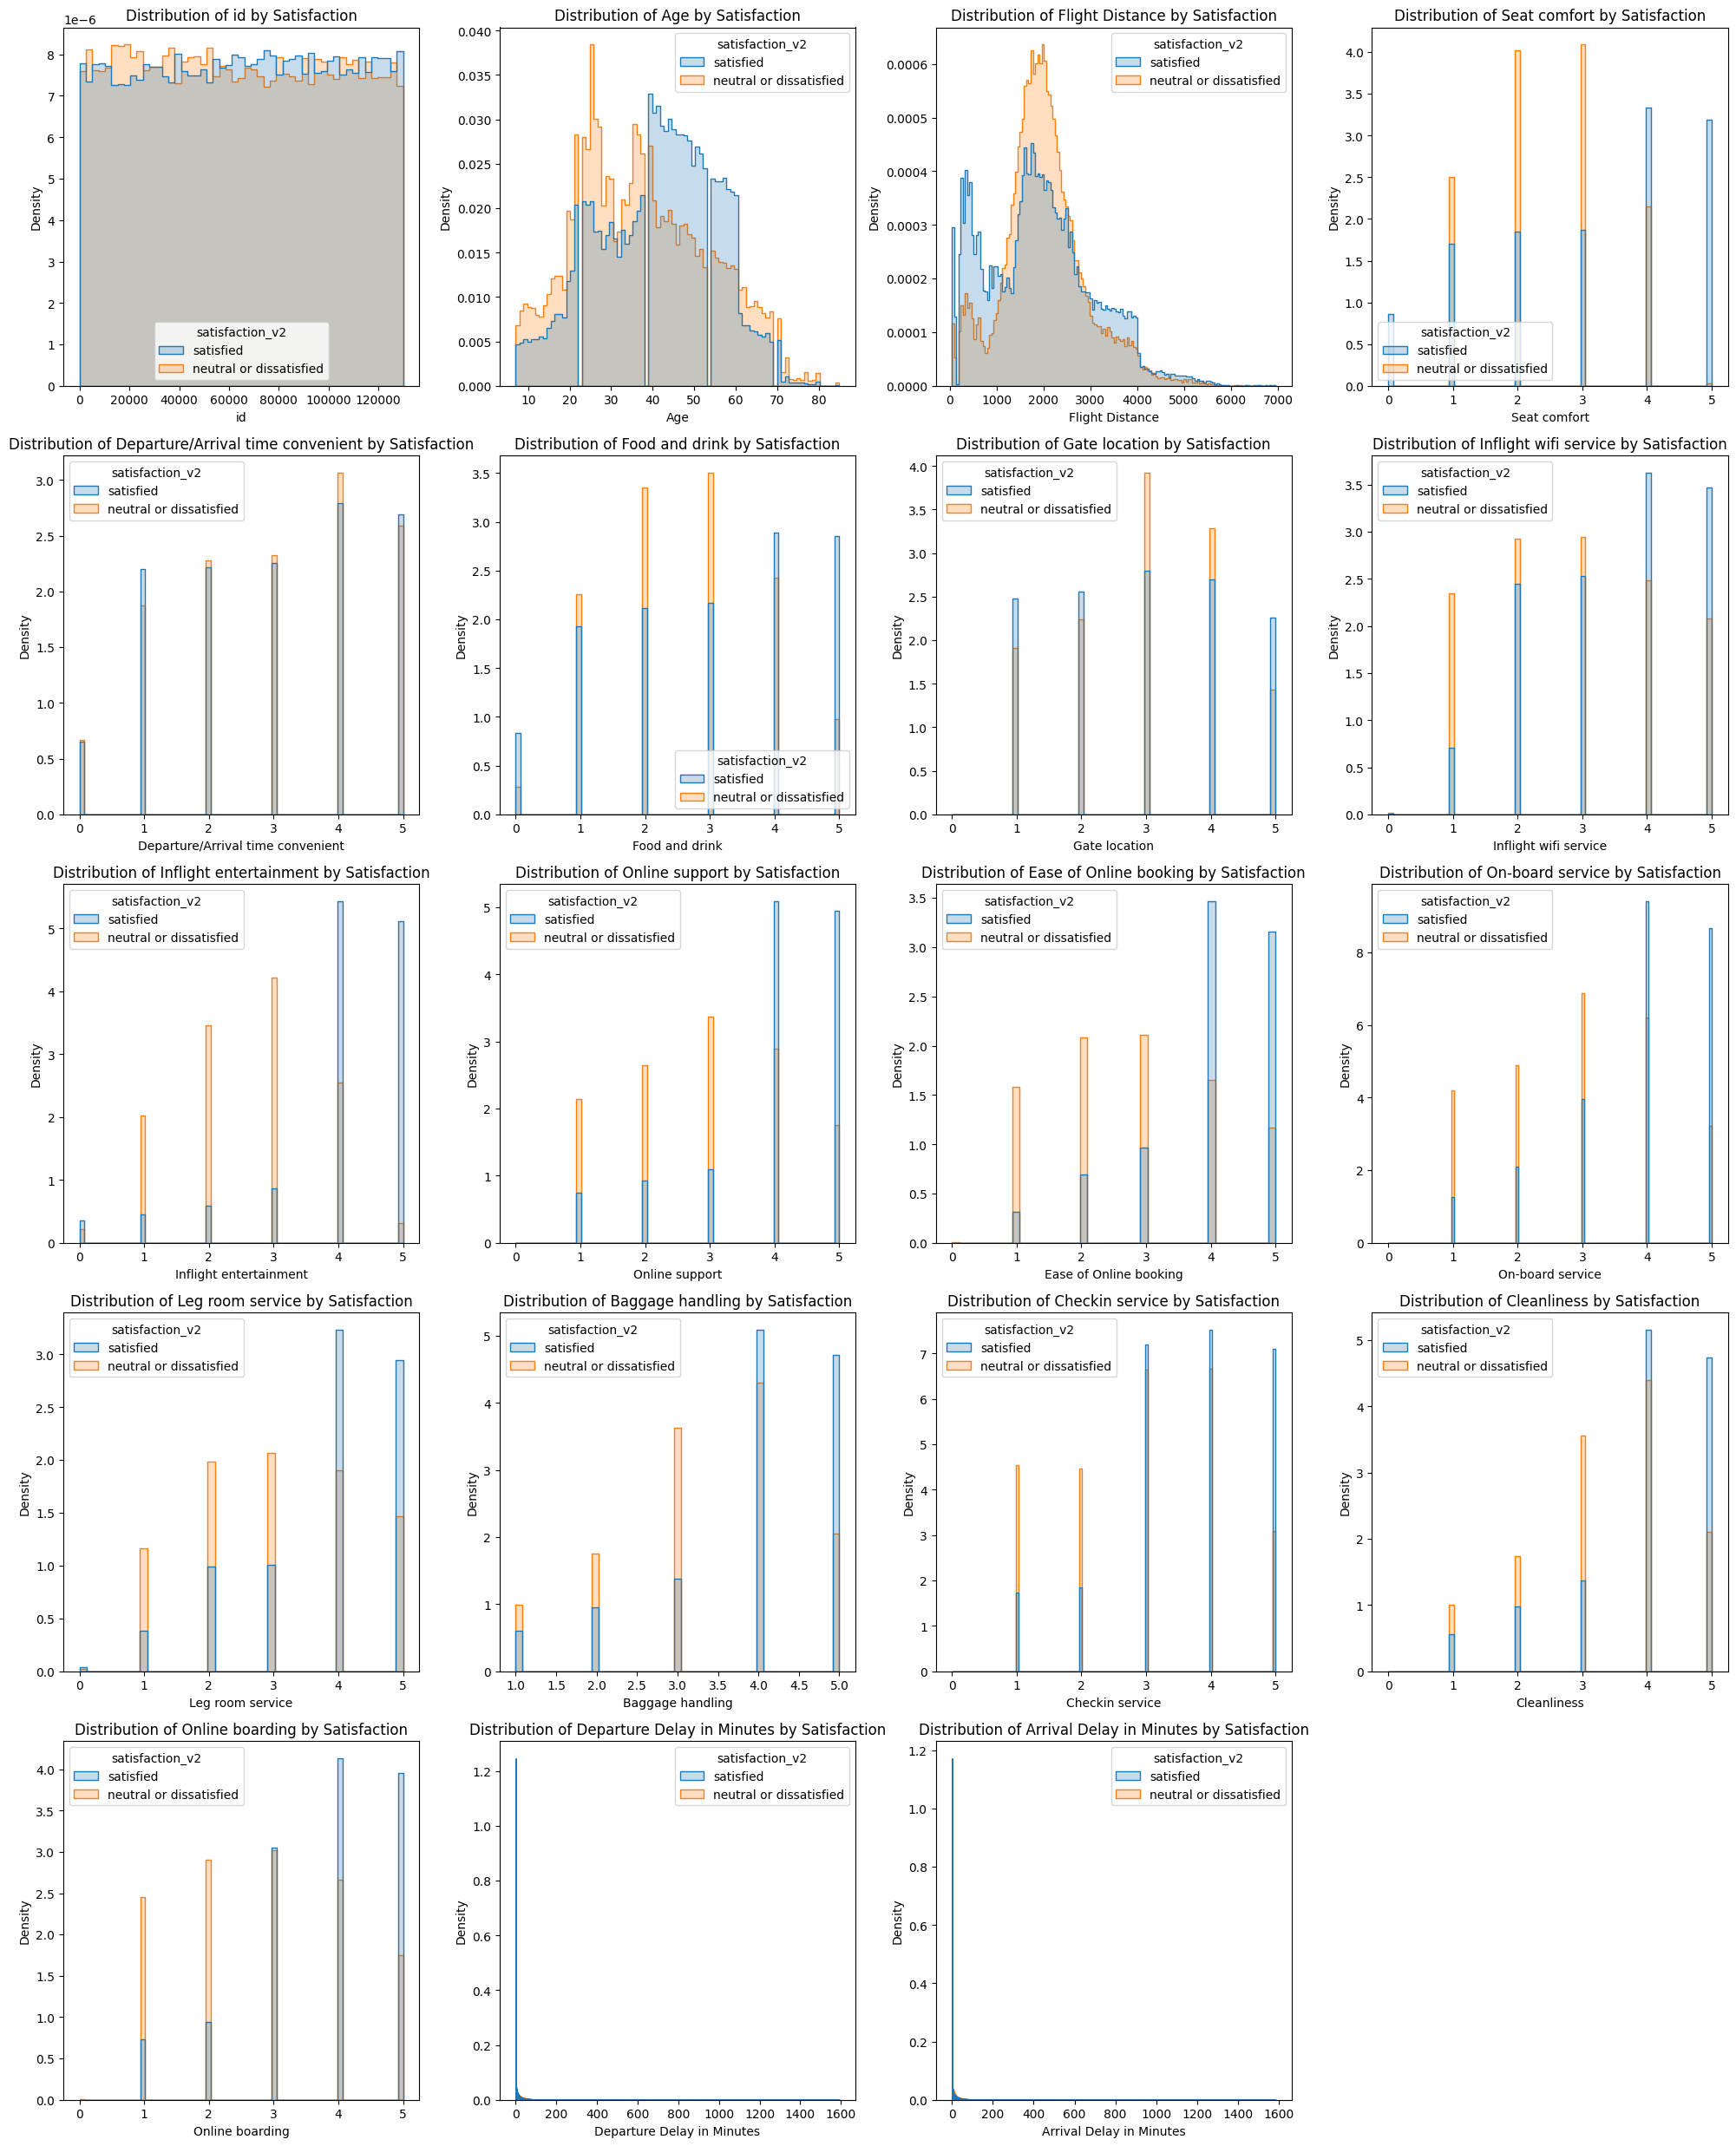

In [9]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 4
n_rows = -(-len(numeric_cols) // n_cols)  # Ceiling division

# Prepare subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, hue='satisfaction_v2', ax=axes[i], element='step', stat='density', common_norm=False)
    axes[i].set_title(f'Distribution of {col} by Satisfaction')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## feature selection

In [10]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
le = LabelEncoder()
df_copy['satisfaction_v2'] = le.fit_transform(df_copy['satisfaction_v2'])


In [12]:
# Correlation with target
correlations = df_copy.corr(numeric_only=True)['satisfaction_v2'].sort_values(key=abs, ascending=False)
print("Correlation with 'satisfaction_v2':\n", correlations)


Correlation with 'satisfaction_v2':
 satisfaction_v2                      1.000000
Inflight entertainment               0.523496
Ease of Online booking               0.431772
Online support                       0.390143
On-board service                     0.352047
Online boarding                      0.338147
Leg room service                     0.304928
Checkin service                      0.266179
Baggage handling                     0.260347
Cleanliness                          0.259330
Seat comfort                         0.242384
Inflight wifi service                0.227062
Food and drink                       0.120677
Age                                  0.117971
Arrival Delay in Minutes            -0.080691
Departure Delay in Minutes          -0.073909
Flight Distance                     -0.039224
Departure/Arrival time convenient   -0.015507
id                                   0.013728
Gate location                       -0.012071
Name: satisfaction_v2, dtype: float64


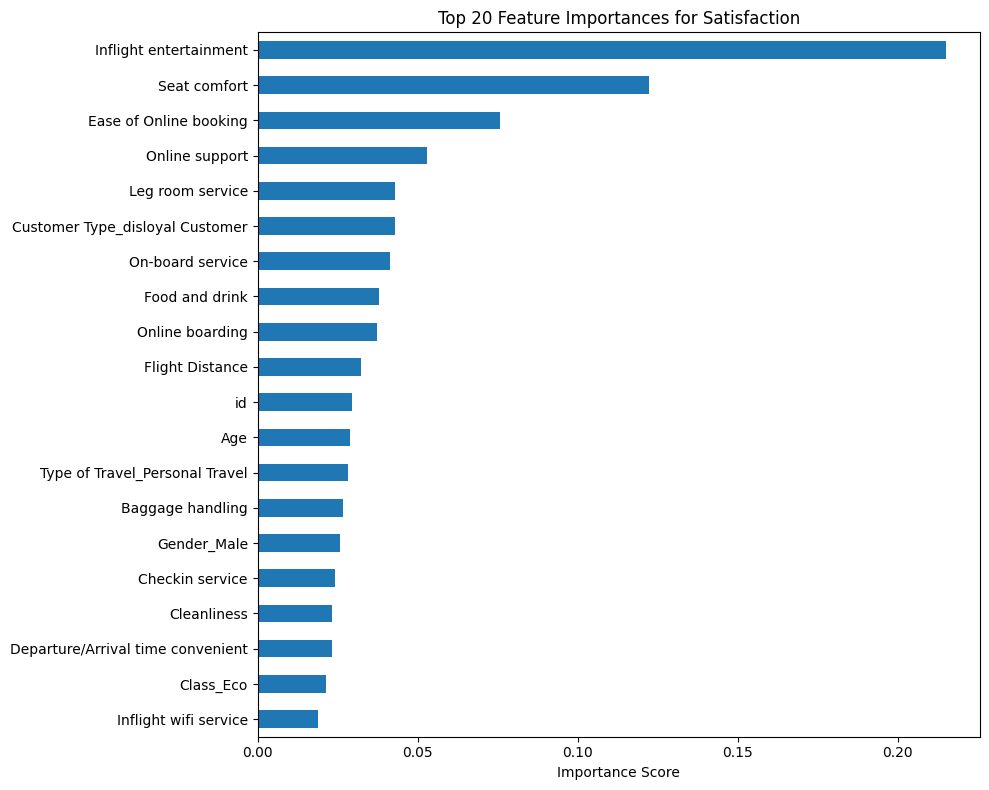

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

X = df_copy.drop('satisfaction_v2', axis=1)
y = df_copy['satisfaction_v2']

X = pd.get_dummies(X, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
importances.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 20 Feature Importances for Satisfaction')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [14]:
X = df.drop('satisfaction_v2', axis=1)  # target column (adjust if different)
y = df['satisfaction_v2']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# Fit imputer on training data and transform both train and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [ ]:
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train_imputed, y_train)

y_pred = model.predict(X_test_imputed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11759
           1       0.97      0.96      0.96     14217

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[11355   404]
 [  629 13588]]
